In [8]:
import pandas as pd
import matplotlib as mp
import os
df = pd.read_csv('thetis_mrv_2019_12_24.pax.with_co2_data.csv')
df

,Unnamed: 0,imo,name,ship_type,reporting_period,technical_efficiency,port_of_registry,home_port,ice_class,doc_issue_date,...,voluntary_reporting_average_fuel_consumption_per_transport_work_on_laden_voyages_pax,voluntary_reporting_average_fuel_consumption_per_transport_work_on_laden_voyages_freight,voluntary_reporting_average_co2_emissions_per_distance_on_laden_voyages,voluntary_reporting_average_co2_emissions_per_transport_work_on_laden_voyages_mass,voluntary_reporting_average_co2_emissions_per_transport_work_on_laden_voyages_volume,voluntary_reporting_average_co2_emissions_per_transport_work_on_laden_voyages_dwt,voluntary_reporting_average_co2_emissions_per_transport_work_on_laden_voyages_pax,voluntary_reporting_average_co2_emissions_per_transport_work_on_laden_voyages_freight,voluntary_reporting_additional_comments,voluntary_reporting_average_density_of_the_cargo_transported
0,0,5383304,ASTORIA,Passenger ship,2018.0,Not Applicable,NaN,NaN,NaN,05/02/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6417097,MARCO POLO,Passenger ship,2018.0,Not Applicable,NaN,NaN,IC,05/02/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6511128,RED STAR 1,Ro-pax ship,2018.0,EIV (45.57 gCO₂/t·nm),NaN,NaN,NaN,30/04/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6602898,OCEAN MAJESTY,Passenger ship,2018.0,EIV (31.73 gCO₂/t·nm),Madeira,NaN,NaN,06/05/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,7037806,BOHUS,Ro-pax ship,2018.0,EIV (146 gCO₂/t·nm),NaN,NaN,IC,30/04/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,11734,9809095,GARDENIA SEAWAYS,Ro-ro ship,2018.0,EIV (11.16 gCO₂/t·nm),Klaipeda,Klaipeda,NaN,29/04/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,11735,9809100,TULIPA SEAWAYS,Ro-ro ship,2018.0,EIV (11.16 gCO₂/t·nm),Klaipeda,NaN,NaN,29/04/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,11751,9814026,LE LAPEROUSE,Passenger ship,2018.0,EEDI (20.4 gCO₂/t·nm),NaN,NaN,IC,24/06/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,11752,9814038,LE CHAMPLAIN,Passenger ship,2018.0,EEDI (19.1 gCO₂/t·nm),NaN,NaN,IC,27/06/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
co2 = df['annual_average_co2_emissions_per_transport_work_pax']
co2.shape

(763,)

In [11]:
co2.describe()

count       493.000000
mean       2871.530852
std       36404.687531
min           0.000000
25%         312.580000
50%         625.370000
75%        1292.560000
max      807505.880000
Name: annual_average_co2_emissions_per_transport_work_pax, dtype: float64

In [41]:
co2.quantile(0.99)

10586.141199999996

In [42]:
co2_cut = co2[co2 < co2.quantile(0.9)]

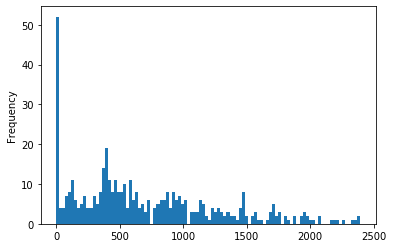

In [46]:
co2_cut.plot.hist(bins=100)

In [44]:
co2_cut.quantile([0.2, 0.4, 0.6, 0.8])

0.2     204.644
0.4     470.984
0.6     866.032
0.8    1481.812
Name: annual_average_co2_emissions_per_transport_work_pax, dtype: float64

In [45]:
co2_cut.quantile([0.2, 0.4, 0.6, 0.8]) / 1.852

0.2    110.498920
0.4    254.311015
0.6    467.619870
0.8    800.114471
Name: annual_average_co2_emissions_per_transport_work_pax, dtype: float64

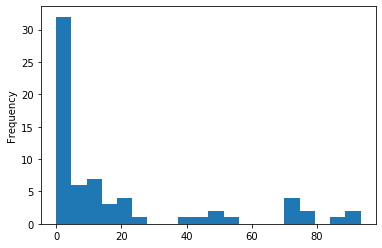

In [50]:
co2[co2 < 100].plot.hist(bins=20)

In [101]:
car_co2_per_km = 85.5
plane_co2_per_km = 144.6
# cf https://www.ademe.fr/expertises/mobilite-transports/chiffres-cles-observations/chiffres-cles
thresholds_km = [car_co2_per_km, plane_co2_per_km, plane_co2_per_km * 2, plane_co2_per_km * 4]
thresholds = [round(i * 1.852001) for i in thresholds_km]
thresholds

[158, 268, 536, 1071]

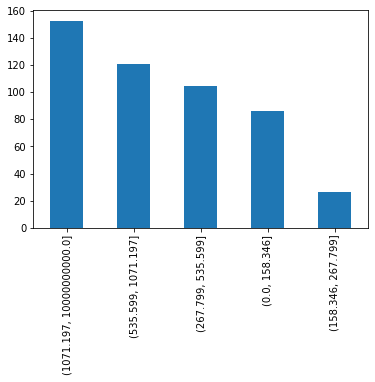

In [100]:
pd.cut(co2, [0] + thresholds + [10**10]).value_counts().plot.bar()

In [87]:
co2

0         993.14
1         639.96
2           2.07
3        1124.27
5        1017.63
          ...   
11506    1150.46
11570      10.32
11607     683.11
11751    1466.00
11752    1749.37
Name: annual_average_co2_emissions_per_transport_work_pax, Length: 493, dtype: float64

In [ ]:
 3